<a href="https://colab.research.google.com/github/KoshiBG/Python_for_data_analysis/blob/main/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%963_Python_%2B_SQL_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 73.2 MB/s eta 0:00:00


In [52]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

In [53]:
import pandas as pd

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [54]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [55]:
cursor = con.cursor()

In [56]:
# SQL-запит для вибору мінімальної та максимальної дати найму
query = """
SELECT MIN(hire_date) AS min_hire_date, MAX(hire_date) AS max_hire_date
FROM employees;
"""
# Виконання запиту
cursor.execute(query)

# Отримання результатів
results = cursor.fetchall()
print(results)

[(datetime.date(1985, 1, 1), datetime.date(2000, 1, 28))]


Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [57]:
# SQL-запит для вибору останньої зарплати кожного співробітника
query = """
SELECT s.emp_no, s.salary, s.from_date, s.to_date
FROM salaries s
INNER JOIN (
    SELECT emp_no, MAX(to_date) AS max_to_date, MAX(from_date) AS max_from_date
    FROM salaries
    GROUP BY emp_no, to_date
) subquery
ON s.emp_no = subquery.emp_no AND s.to_date = subquery.max_to_date AND s.from_date = subquery.max_from_date;
"""

# Виконання SQL-запиту
cursor.execute(query)

# Отримання назв колонок з курсора
column_names = [i[0] for i in cursor.description]

# Збереження результатів у pandas DataFrame
res = pd.DataFrame(cursor.fetchall(), columns=column_names)

In [58]:
# Виведення назв колонок, розміру датафрейму та перших 3 записів
display("Назви колонок:", res.columns.tolist())
display("Розмір датафрейму:", res.shape)
display(res.head(3))

'Назви колонок:'

['emp_no', 'salary', 'from_date', 'to_date']

'Розмір датафрейму:'

(2843891, 4)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [59]:
# Спочатку перевіримо тип даних колонки 'to_date'
display("Тип даних колонки 'to_date':", res['to_date'].dtype)

"Тип даних колонки 'to_date':"

dtype('O')

In [60]:
res['to_date'] = pd.to_datetime(res['to_date'], errors='coerce')

# Тепер фільтруємо і рахуємо кількість рядків, де to_date дорівнює '9999-01-01'
count_9999 = res[res['to_date'] == '9999-01-01'].shape[0]

# Фільтруємо і рахуємо кількість рядків, де to_date не дорівнює '9999-01-01'
count_not_9999 = res[res['to_date'] != '9999-01-01'].shape[0]

# Виведемо результати
print(f"Кількість значень to_date рівних '9999-01-01': {count_9999}")
print(f"Кількість значень to_date НЕ рівних '9999-01-01': {count_not_9999}")

Кількість значень to_date рівних '9999-01-01': 0
Кількість значень to_date НЕ рівних '9999-01-01': 2843891


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

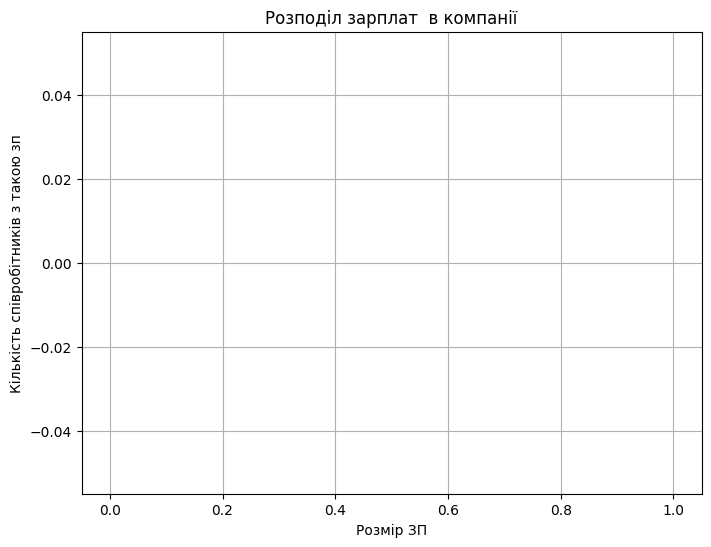

In [68]:
current_employees = res[res['to_date'] == '9999-01-01']

plt.figure(figsize=(8, 6))
plt.hist(current_employees['salary'])

# Додаємо підписи осей і заголовок
plt.title('Розподіл зарплат  в компанії')
plt.xlabel('Розмір ЗП')
plt.ylabel('Кількість співробітників з такою зп')

# Додаємо сітку для кращого зчитування
plt.grid(True)

# Показуємо графік
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [ ]:
con.close()